In [50]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [124]:
def gauss_2D_sample(m, c, n=1000):   # 构造双峰高斯分布
    return np.random.multivariate_normal(m, c, size=n)


def plot_sample(m, c, axis, ps=None):   # 高斯分布图像化
    if ps is None:
        ps = gauss_2D_sample(m, c)
    axis.scatter([p[0] for p in ps], [p[1] for p in ps])
    return ps


def plot_final_result(ps1,ps2,ps, theta):
    four_theta = [0, int(len(theta)/5), int(2*len(theta)/5), int(3*len(theta)/5), int(4*len(theta)/5), len(theta)-1]
    for index in four_theta:
        theta_temp = theta[index]
        theta1 = theta_temp[0]
        theta2 = theta_temp[1]
        plt.scatter([p[0] for p in ps1], [p[1] for p in ps1])
        plt.scatter([p[0] for p in ps2], [p[1] for p in ps2])
        xx = np.linspace(ps[:, 0].min(), ps[:, 0].max(), 100)
        yy = -(theta2 / theta1) * xx

        plt.plot(xx, yy)
        plt.xlim(-8, 8, 1)
        plt.ylim(-8, 8, 1)
        plt.show()
        


def sigmoid_classification(num):
    return 1.0 / (1 + math.exp(-num))


def EKF(data_clusters):
    # 变量初始化
    theta_t1_t1 = np.random.randn(2, 1)
    P_t1_t1 = 0.01 * np.eye(2)

    # 噪声初始化
    ex = np.random.randn(100)
    R = 1 * np.std(ex[0: 10])
    Q = 0.001 * np.eye(2)
    theta_cov = np.zeros((len(data_clusters)+1,2))
    theta_cov[0] = np.random.randn(1, 2)
    count = 1
    for data in data_clusters:
        x = np.asarray(data[:2]).reshape(2, 1)
        y = data[-1]
        theta_t_t1 = theta_t1_t1.copy()
        P_t_t1 = P_t1_t1 + Q
        H_t = np.asarray(-x.T * sigmoid_classification((theta_t_t1.T @ x)[0][0]) * (1 - sigmoid_classification((theta_t_t1.T @ x)[0][0]))).reshape(2, 1)

        e_t = y - sigmoid_classification((theta_t_t1.T @ x)[0][0])
        innovation = H_t.T @ P_t_t1 @ H_t + R
        k_t = (P_t_t1 @ H_t) / innovation
        P_t_t = P_t_t1 - k_t @ H_t.T @ P_t_t1
        theta_t_t = theta_t_t1 + k_t * e_t
        theta_cov[count] = theta_t_t.T
        count += 1
        # print("k:", theta_t_t[1] / theta_t_t[0])
        P_t1_t1 = P_t_t.copy()
        theta_t1_t1 = theta_t_t.copy()
    return theta_cov

In [215]:
m1 = [-3, 3]
c1 = [[2, 1], [1, 2]]
p1 = 0.5

m2 = [3, -3]
c2 = [[2, 1], [1, 2]]
p2 = 0.5

xlim, ylim = [-7, 8], [-8, 8]

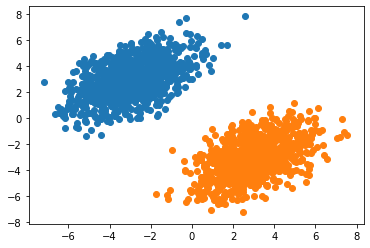

In [216]:
fig1, axes = plt.subplots(nrows=1, ncols=1)
data_cluster1 = np.array(plot_sample(m1, c1, axes))
d_1 = data_cluster1
data_cluster1 = np.c_[data_cluster1, np.zeros(len(data_cluster1))]


data_cluster2 = plot_sample(m2, c2, axes)
d_2 = data_cluster2
data_cluster2 = np.c_[data_cluster2, np.ones(len(data_cluster2))]

data_clusters = np.concatenate((data_cluster1, data_cluster2), axis=0)

test_theta = EKF(data_clusters)


# plot_final_result(d_1, d_2, data_clusters, test_theta)


Text(0.5, 1.0, 'Slope of Classification Plane(alpha=3)')

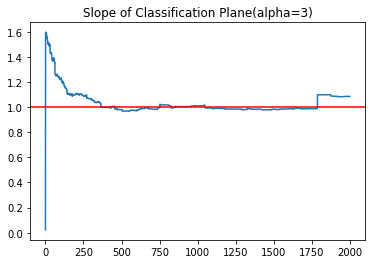

In [218]:
k_track = []

for item in test_theta:
    k_track.append(-(item[1]/item[0]))
    
plt.plot(k_track)
plt.axhline(y=1, color='r')
plt.title("Slope of Classification Plane(alpha=3)")